In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

def basic_figure_style():
    SMALL_SIZE = 6*2                                    
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*2

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=2) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)


    # plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches
    ######################################################
basic_figure_style()
cb = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']



In [8]:
cb = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
linesbins = {'fe17':[0.715,0.717],'o7f':[0.574,0.576],'o8':[0.653,0.656]}

natasha_res = {'fe17':[[11.75,12.25, 12.75, 13.25, 13.75],[-1,2.3,2.7,3,3]], 'o7f':[[11.75,12.25, 12.75, 13.25, 13.75],[0,1,2,3,3]], 'o8':[[11.75,12.25, 12.75, 13.25, 13.75],[0.5,1.3,2.8,3.5,4]]}
mass_filter = np.array([13, 13.5, 14, 14.5, 15])
fig, axs = plt.subplots(3,1, figsize = (6,18), sharex = True)
for i, mf in enumerate(mass_filter):
    print(mf)
    workpath = f'/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/results/xraysb_csvs_230504_13.0_groups_1028halos'
    df = pd.read_csv(f'{workpath}/xray_linelum_snapshot75_halomass_btw_{int(mf*10)}_{int((mf+0.5)*10)}_230404.csv') 
    haloids = df['halo_ids']
    for j, line in enumerate(['o8', 'o7f', 'fe17']): 
        lum = np.full((len(haloids)), np.nan)
        for k, haloid in enumerate(haloids):
            df_part = pd.read_csv(f'{workpath}/xray_linelum_snapshot75_halo{int(haloid-1)}_partlum_230404.csv')
            lum[k] = np.nansum(df_part[line][df_part['jointmsk']])
        axs[j].errorbar(np.ones(len(lum))*(mf+0.25), np.median(lum, axis=1)/np.array(linesbins[line]).mean()/(3.09e24)**2*1e4/1.602e-9*1e5, xerr = 0.25,color = cb[i], fmt = '.')
        axs[j].errorbar(np.ones(len(lum))*(mf+0.25), np.percentile(lum,84, axis=1)/np.array(linesbins[line]).mean()/(3.09e24)**2*1e4/1.602e-9*1e5, xerr = 0.25,color = cb[i], fmt = '.')
        axs[j].errorbar(np.ones(len(lum))*(mf+0.25), np.percentile(lum,16, axis=1)/np.array(linesbins[line]).mean()/(3.09e24)**2*1e4/1.602e-9*1e5, xerr = 0.25,color = cb[i], fmt = '.')
for j, line in enumerate(['o8', 'o7f', 'fe17']):
    for k in range(2):
        axs[j].errorbar(natasha_res[line][0], np.power(10,natasha_res[line][1]), xerr = 0.25, alpha = 0.1, color = 'k')
    axs[j].set_yscale('log')
    axs[j].set_xticks(np.arange(11.5,15.5,0.5))
    axs[j].set_ylim(1e-3, 1e7)
    axs[j].set_title(f'xray line luminosity of {line} for halos')
    axs[j].set_ylabel(f'L [photons/100ks/$\\rm m^2$]')
    axs[j].set_xlabel(f'$\\rm log_{{10}}M_{{200c}}$ [$\\rm M_\odot$]')
    axs[j].grid(True)
plt.savefig(f'{workpath}/png/halomass_vs_xraylum.png')
print(f'{workpath}/png/halomass_vs_xraylum.png is saved!')

SyntaxError: invalid syntax (<ipython-input-8-a90341d61a97>, line 7)

In [11]:
np.array(natasha_res[line])[1].mean(axis=0)

SyntaxError: invalid syntax (<ipython-input-11-507644a50032>, line 1)

plot halo positions in the box

In [ ]:
fig,axs = plt.subplots(3,1,figsize = (8,8*3), sharey = True)
for i, mf in enumerate(mass_filter[::-1]):
    print(mf)
    df = pd.read_csv(f'{workpath}/xraylum_csvs/xray_linelum_snapshot75_halomass_btw_{int(mf*10)}_{int((mf+0.5)*10)}_rep9_tablewrongz_230402.csv') 
    xc, yc, zc = df['x_gasmass_center'],df['y_gasmass_center'],df['z_gasmass_center']
    axs[0].scatter(xc,yc, marker = '*', s=100, color = cb[i])
    axs[1].scatter(yc,zc, marker = '*', s=100, color = cb[i], label = f'mass btw {mf:.1f}-{mf+0.5:.1f}')
    axs[2].scatter(xc,zc, marker = '*', s=100, color = cb[i])
axs[0].set_title('x-y')
axs[1].set_title('y-z')
axs[2].set_title('x-z')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_xlim(0,1000)
axs[0].set_ylim(0,1000)
axs[1].set_xlim(0,1000)
axs[1].set_ylim(0,1000)
axs[2].set_xlim(0,1000)
axs[2].set_ylim(0,1000)
axs[0].set_xlabel('Mpc')
axs[0].set_ylabel('Mpc')
axs[1].set_xlabel('Mpc')
axs[1].set_ylabel('Mpc')
axs[2].set_xlabel('Mpc')
axs[2].set_ylabel('Mpc')

check weird large lum in 1e13 solar mass halos

In [ ]:

haloids = [11790465, 5042360, 3019328, 8174215]
fig, axs = plt.subplots(1,len(haloids),figsize = (16,4))
for i, haloid in enumerate(haloids):
    file = f'{workpath}/xraylum_csvs/xray_linelum_snapshot75_halo{int(haloid-1)}_partlum_rep9_tablewrongz_230402.csv'
    
    df = pd.read_csv(file)
    for j, line in enumerate(['fe17', 'o7f', 'o8']):
        axs[i].hist(df[line], np.logspace(20,50,100), alpha = 0.6, label = line)
        axs[i].set_xscale('log')
        print(line,np.nansum(df[line]), np.nanmax(df[line]), np.sum(df[line]>1e60), np.nansum(df[line][df[line]<1e60]), np.where(df[line]>1e60))
        axs[i].legend()

compare hist btw halos with recently heated particles and without

3957 3957
3957 3957
3957 3957
12253 12253
12253 12253
12253 12253
2986 2986
2986 2986
2986 2986
5252 5252
5252 5252
5252 5252
1738 1738
1738 1738
1738 1738
240 240
240 240
240 240
124355 124355
124355 124355
124355 124355
40726 40726
40726 40726
40726 40726
126820 126820
126820 126820
126820 126820
14456 14456
14456 14456
14456 14456
129711 129711
129711 129711
129711 129711
194 194
194 194
194 194
768 768
768 768
768 768
72649 72649
72649 72649
72649 72649
1985 1985
1985 1985
1985 1985
15054 15054
15054 15054
15054 15054
34120 34120
34120 34120
34120 34120
54289 54289
54289 54289
54289 54289
14265 14265
14265 14265
14265 14265


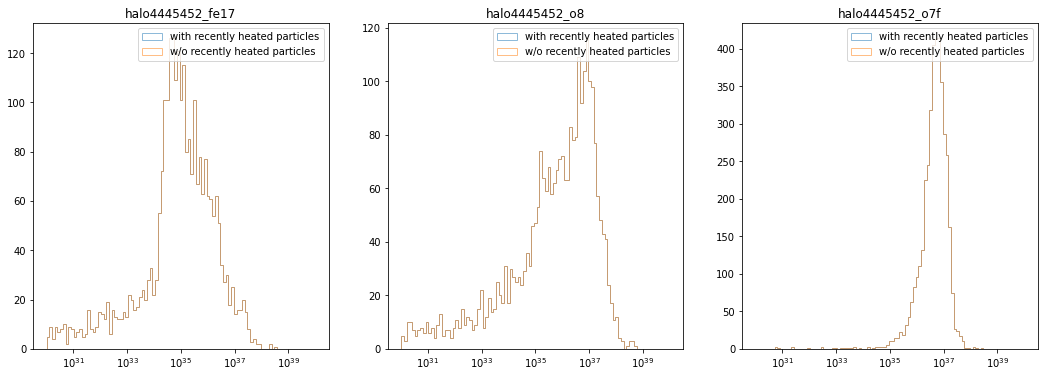

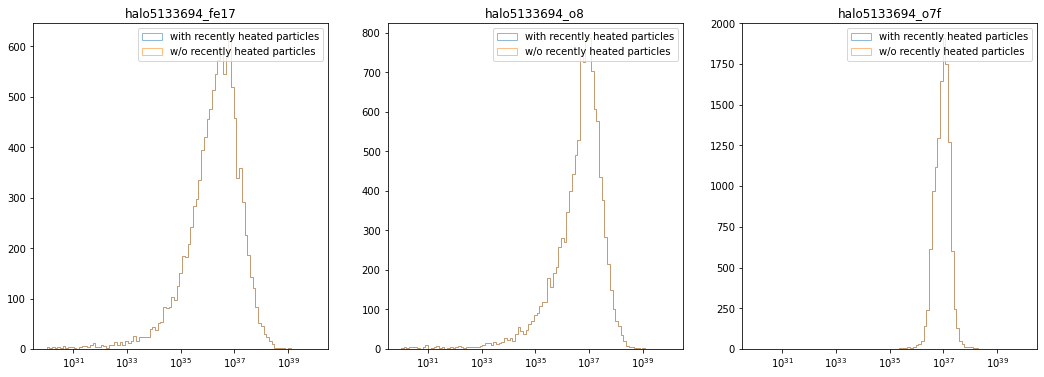

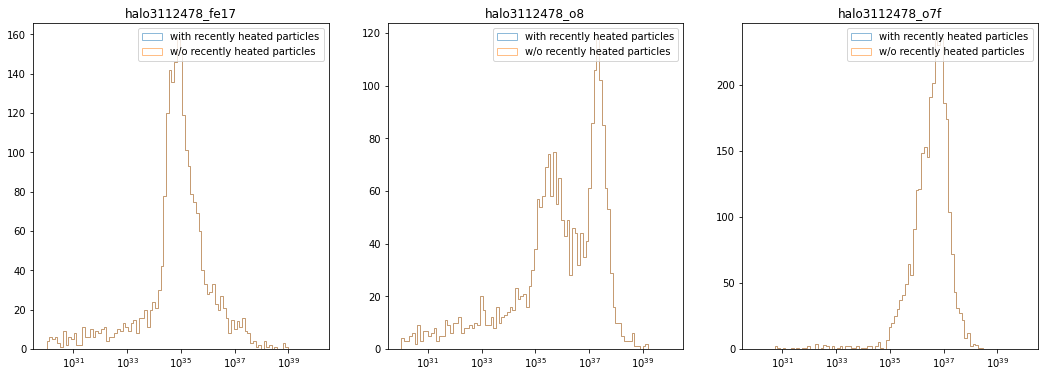

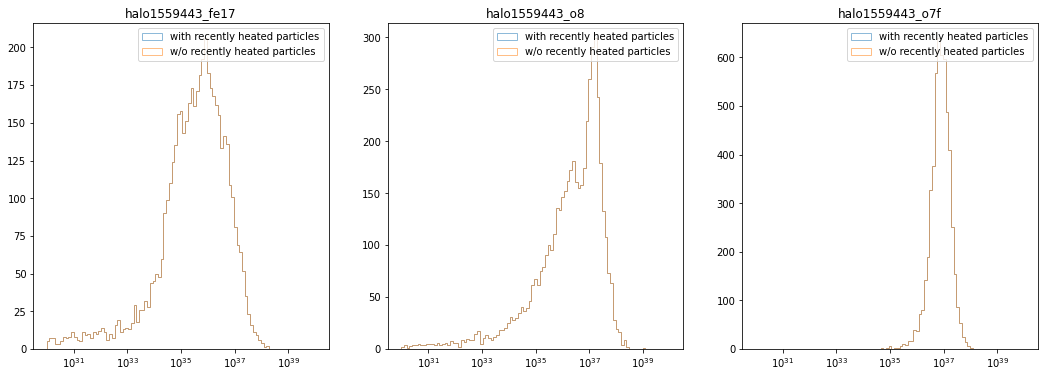

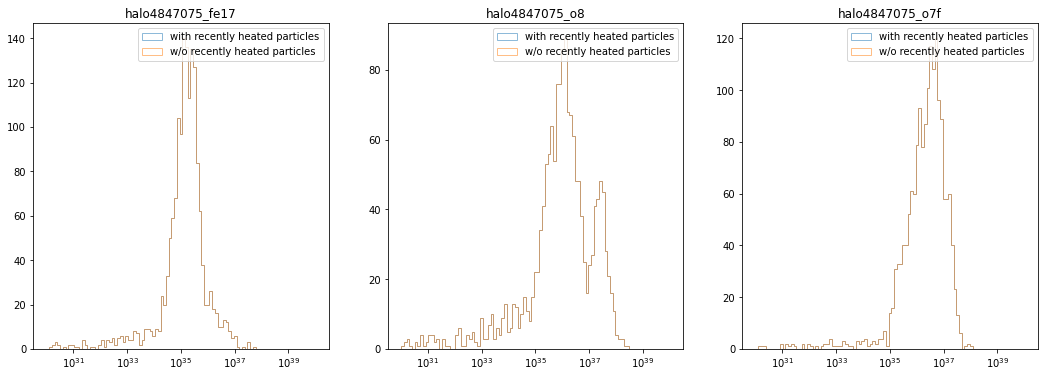

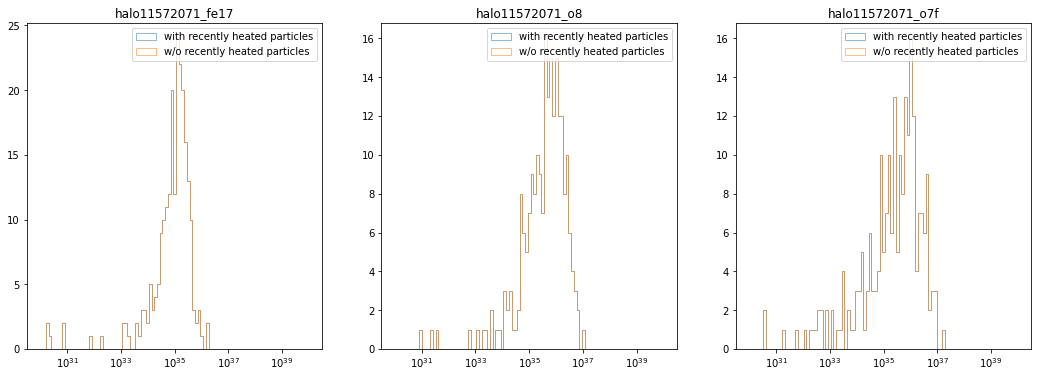

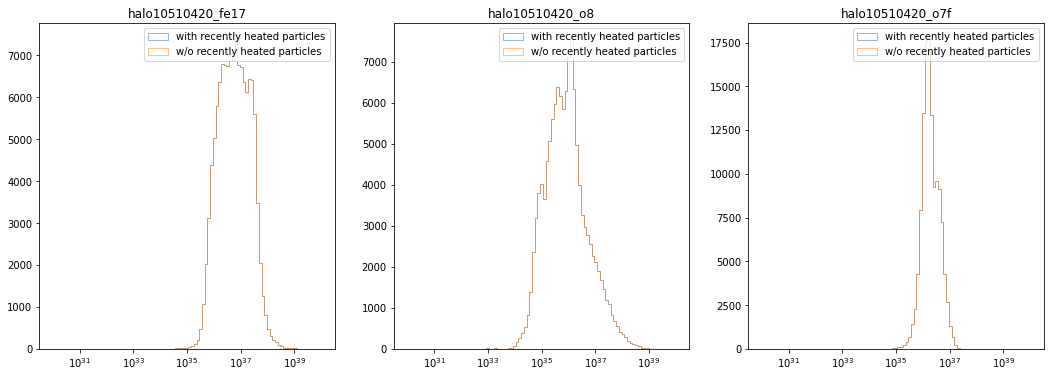

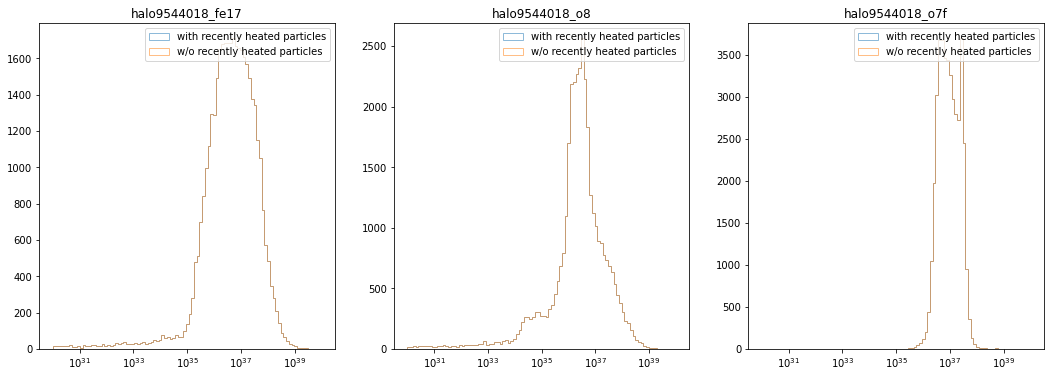

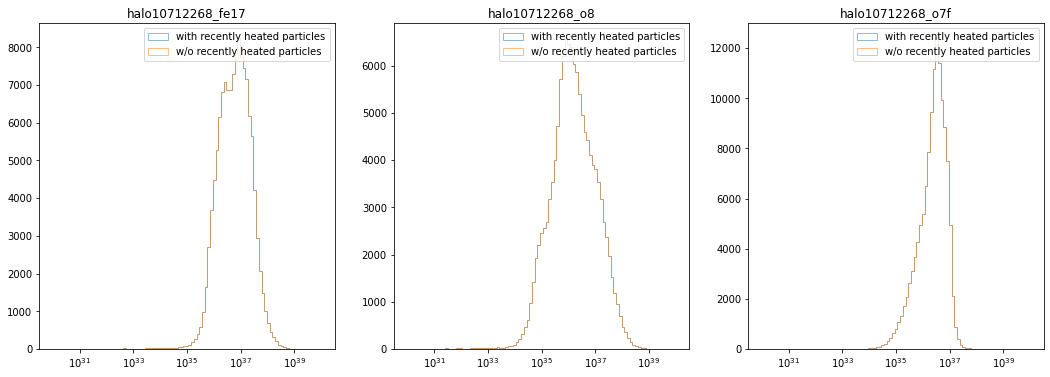

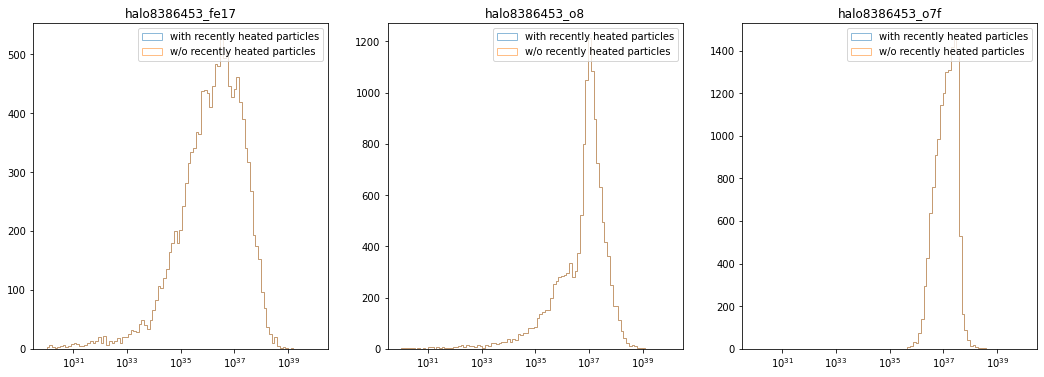

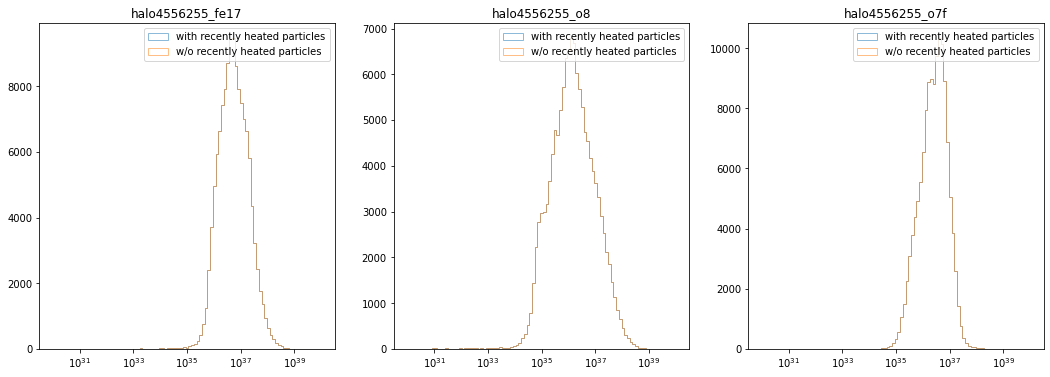

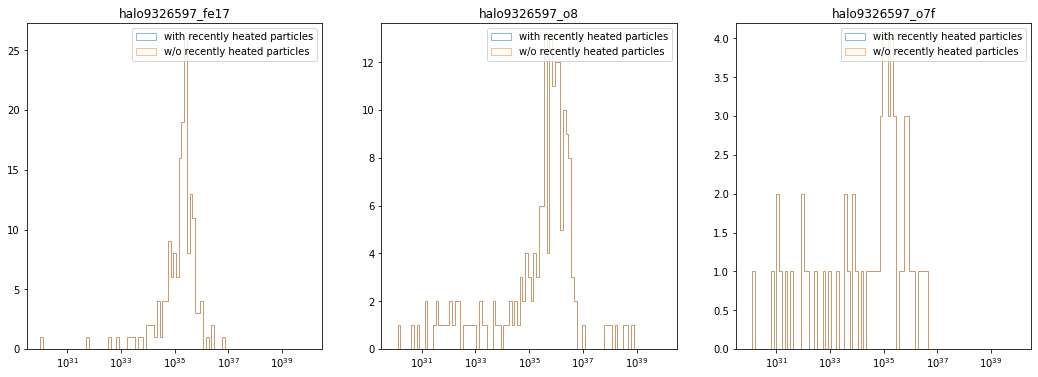

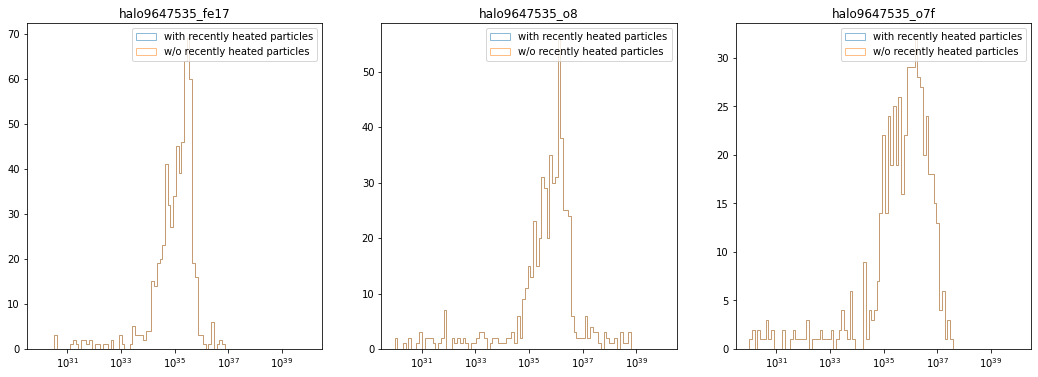

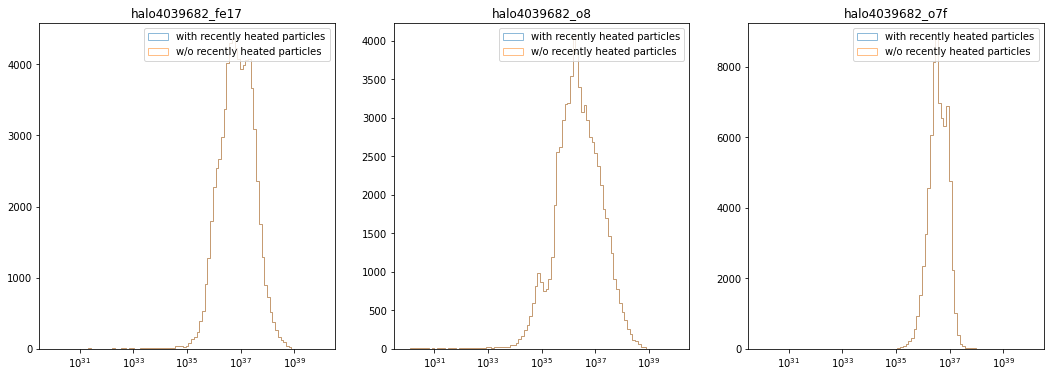

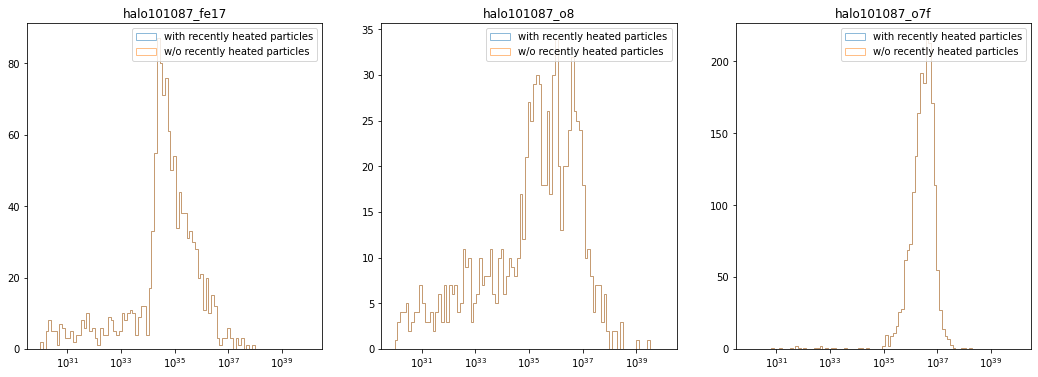

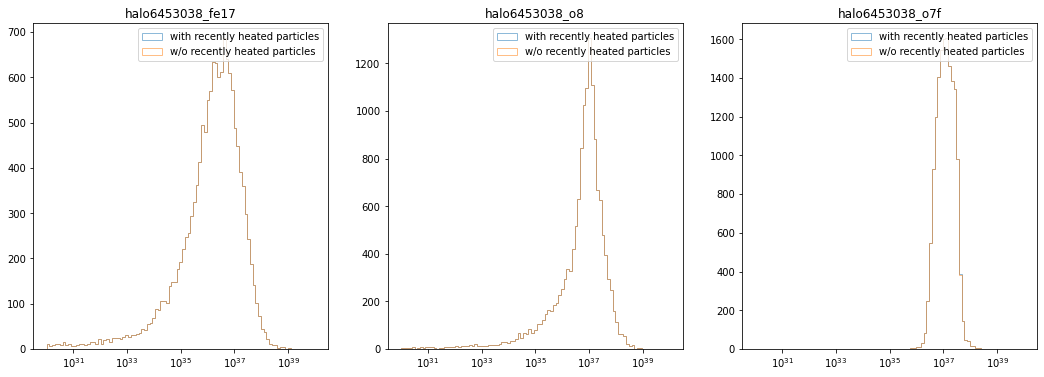

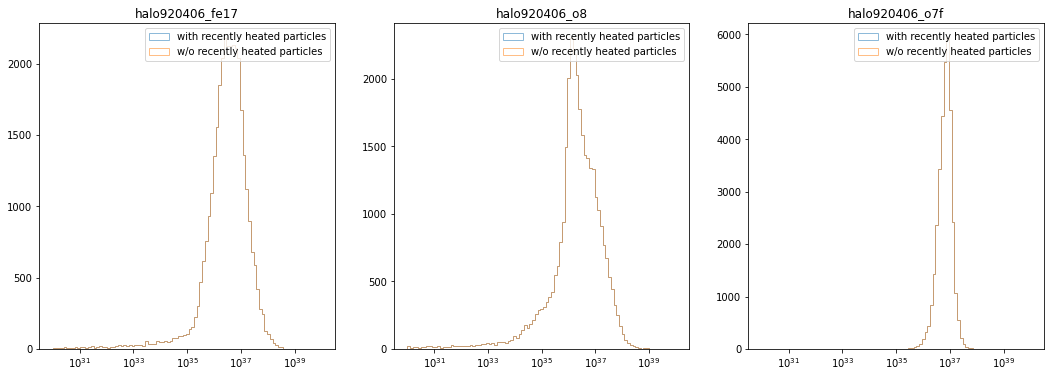

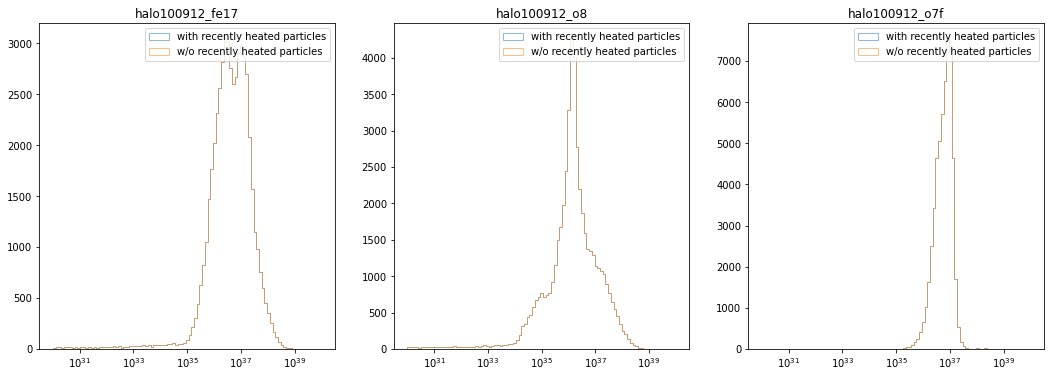

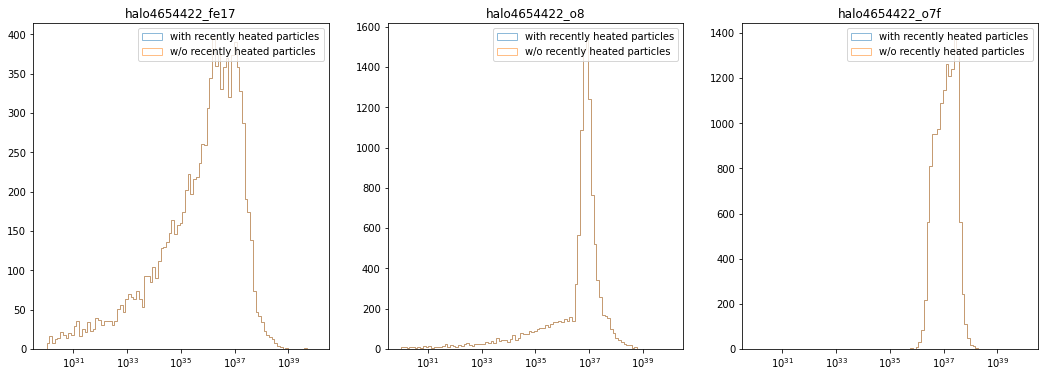

In [7]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# workpath1 = '/cosma8/data/dp004/dc-chen3/work/bin/gen_xray_pipeline/230318/cal_halo_lum_by_halo_230331/xraylum_csvs_230410_lumandprop_agncorrect'
workpath1 = '/cosma8/data/dp004/dc-chen3/work/bin/gen_xray_pipeline/230318/cal_halo_lum_by_halo_230331/xraylum_csvs_230411'
workpath2 = '/cosma8/data/dp004/dc-chen3/work/bin/gen_xray_pipeline/230318/cal_halo_lum_by_halo_230331/xraylum_csvs_230411_mskcorr'

# halomass_dict = {}
# files = glob(f'{workpath1}/*btw*csv')
# for file in files:
#     halomass_dict[f'{file.split("_")[-3]}'] = f'{file["halo_ids"]}'
files = glob(f'{workpath1}/*partlum*csv')
files = [file.split('/')[-1] for file in files]
for file in files:
    df_wh = pd.read_csv(f'{workpath1}/{file}')
    df_oh = pd.read_csv(f'{workpath2}/{file}')
    fig, axs = plt.subplots(1, 3, figsize = (18, 6))
    for i, line in enumerate(['fe17', 'o8', 'o7f']):
        print(np.sum(df_wh[line]!=0), np.sum(df_oh[line]!=0))
        # print(np.sum(df_wh[line]!=df_oh[line]))
        axs[i].hist(df_wh[line], np.logspace(30,40,100), alpha = 0.5, histtype = 'step', label = 'with recently heated particles')
        axs[i].hist(df_oh[line][df_oh['jointmsk']], np.logspace(30,40,100), alpha = 0.5, histtype = 'step', label = 'w/o recently heated particles')
        axs[i].set_title(f'{file.split("_")[3]}_{line}')
        axs[i].set_xscale('log')
        axs[i].legend()